<a href="https://colab.research.google.com/github/aquapathos/pictures/blob/master/%E3%83%8F%E3%83%95%E5%A4%89%E6%8F%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hough（ハフ） 変換

In [0]:
import urllib.request
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import widgets

# 1.  画像のアップロードと読み込み
## 対象画像について
ハフ変換が直線を検出する処理であることをふまえ，直線を検出することで何ができるようになるか，ということを意識して画像を選ぶこと．

Saving testimage.png to testimage.png


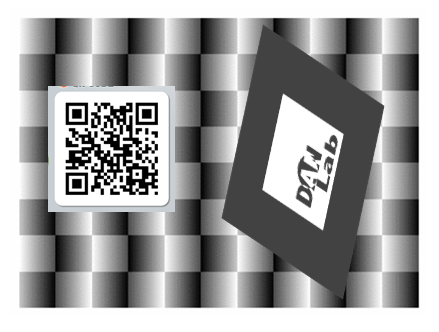

In [0]:
from google.colab import files
filename = list(files.upload())[0]
img = cv2.imread(filename,1) # カラーで読み込み
gry = cv2.imread(filename,0) # グレイで読み込み
cv2_imshow(img)

# 2. Canny法によるエッジ検出
　ハフ変換は２階調の線画に直線をあてはめる処理である．境界以外に直線が当てはまることはなく処理時間の無駄となるので，まずエッジ検出を行う．
エッジ検出のフィルタは数多く存在するが，ここでは結果が２値となる，Canny法を用いる．

![Alt text](https://monosnap.com/image/F07UTJ0ByXNJG5OJVaxOnzeBp0YxNH)

　Canny 法は複数のステップで２階調の線画像を得る．

1. ガウシアンフィルタにより画像を平滑化する．ノイズの除去がその目的である．
2. Sobel のフィルタによりエッジ強度の勾配と方向を求め
3. エッジ上の点では勾配方向に対して勾配の強さが極大となっているはずであるから，それ以外の点は除外する．
4. エッジの候補点のうち，パラメータmaxValよりも強度の強い点をエッジであると確定する．
5. すでにエッジであると確定している点に連続する点で，パラメータ minVal よりもエッジ強度の強い点もエッジに加える．この操作を再帰的に実行する．

　たとえば，図１を原画像とするとエッジ強度は図２のようになる．図３は赤枠と青枠の部分を水平方向に見たとき，水平方向を横軸，エッジ強度を縦軸に取ったグラフである．たとえば，図３の緑のレベルをしきい値として図２を２階調化すると図４のような２値画像が得られる．赤枠部のエッジは中央部が途切れ，青枠部は中央部のみが検出される．
 　図に示すmaxValとminValをパラメータとして指定したとすると，青部分はエッジ強度が弱く maxVal を超える点がないため，Canny法ではエッジではないと判断される．赤部分は左右の部分が maxVal を超えるため，ステップ４でエッジ点と確定する．中央部はそれらの点と連続しており，minVal よりも強度が強いため，ステップ５でエッジ点に追加される．
  結果として，Canny法のエッジ検出結果は図５に示すように，赤枠部が横１線のラインとなり，青枠部分の弱いエッジは無視される．

## Canny 法のパラメータ
cv2.Canny(画像, minVal, maxVal)

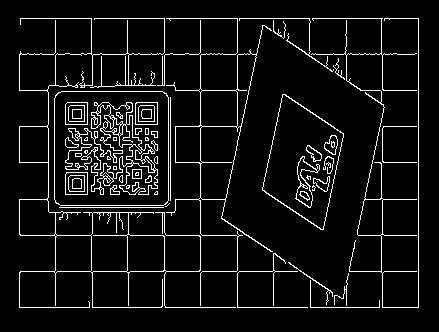

In [0]:
minVal = 50 #@param {type:"slider", min:0, max:255, step:1}
maxVal = 150 #@param {type:"slider", min:0, max:255, step:1}

canny = cv2.Canny(gry, minVal, maxVal)
cv2_imshow(canny)

# 3. Hough 変換

lines = cv2.HoughLines(canny,1,np.pi/180,thres)

投票 100点以上の直線は 32本検出されました.



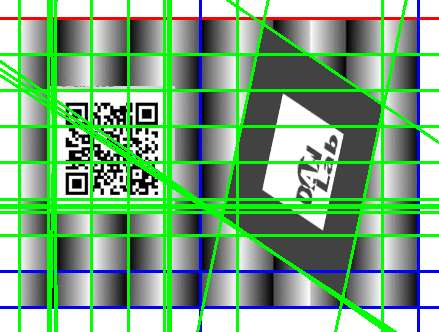

In [0]:
thres = 100#@param {type:"slider", min:0, max:255, step:1}
lines = cv2.HoughLines(canny,1,np.pi/180,thres)
img2 = img.copy()
print("投票 {}点以上の直線は {}本検出されました.\n".format(thres,len(lines)))
for index, [[rho,theta]] in enumerate(lines):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    if index == 0:
      color = (0,0,255)
    elif index < 5 :
      color = (255,0,0)
    else:
      color = (0,255,0)
    cv2.line(img2,(x1,y1),(x2,y2),color,2)
    
cv2_imshow(img2)